# Framingham Heart Study
- The study had included cardiovascular diseases risk factors such as:
  - Blood pressure 
  - Smoking history 
  - Health measurements
  - Medication use

- The incidence/outcome are measured and recorded in the dataset:
   - 10 year risk of CHD

## Project Objectives
1. Data Cleaning
   - Examine for missing data
   - Examine Outlier

2. Conduct Exploratory Data Analysis
   - Explore the relationship between each of the risk factors with the respective outcomes observed 
   - Comparing data from Day 0 to Last period of measure to see if there's any outcome difference

3. Conduct Regression Analysis
   - Determine what type of regression analysis to be conducted. 

4. Creating a ML model using the train dataset
   - Create model based on variables examine to be correlated
   - Fine tune model 
  
5. Testing model to determine accuracy of model from train dateset

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
profile = pr(df, title="Heart Study")
profile

In [19]:
df = pd.read_csv('D:\Dropbox\PythonProjects\pythonprojects\Heart Study (Cohort)\subset.txt')

df.info()
df.columns
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

There are several missing data observes in education, cigsPerDay, BPMeds, totChol, BMI, heartRate and glucose. This needs to be looked into to further explore if the data needs any imputation or should the observations be removed from the analysis.

In [ ]:
%matplotlib inline
genderpairs= sns.pairplot(df, hue="male")
genderpairs

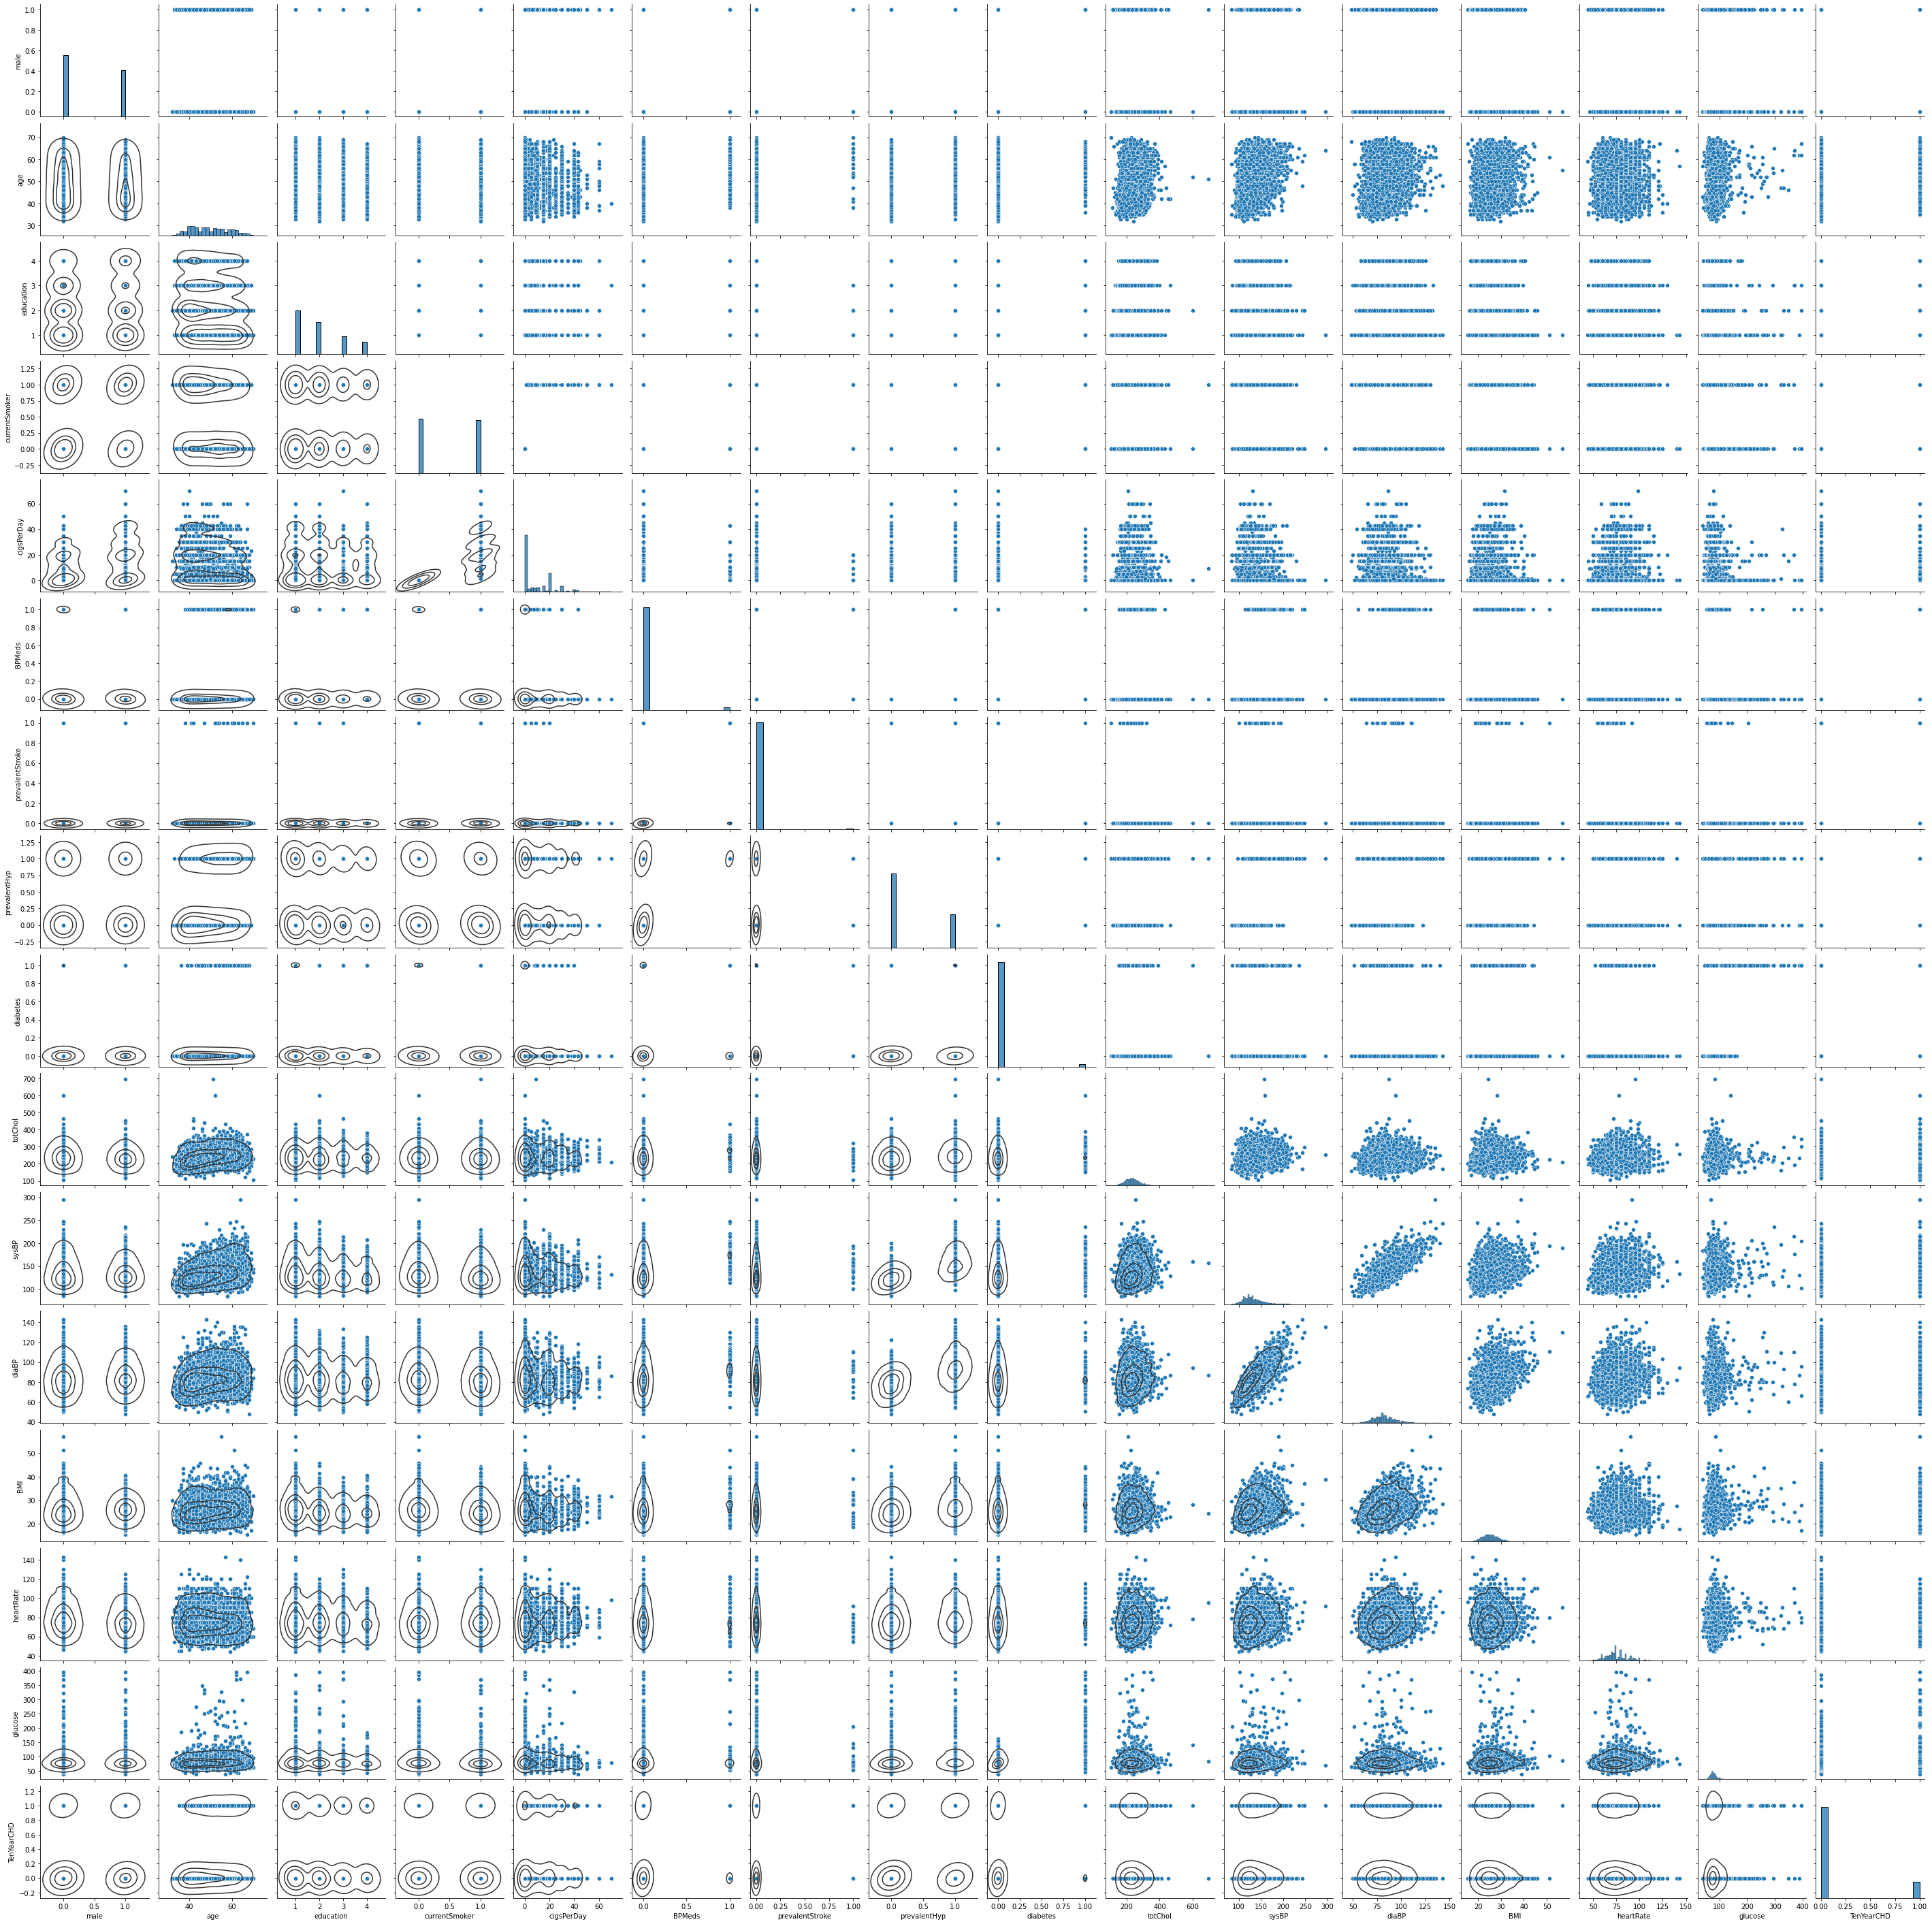

In [41]:
%matplotlib inline
pairs= sns.pairplot(df)
pairs.map_lower(sns.kdeplot, levels=4, color=".2")

In [51]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.017415,0.197026,0.317143,-0.052504,-0.004550,0.005853,0.015693,-0.070413,-0.035879,0.058199,0.081871,-0.116932,0.005979,0.088374
age,-0.029014,1.000000,-0.166356,-0.213662,-0.192959,0.123052,0.057679,0.306799,0.101314,0.262554,0.394053,0.205586,0.136096,-0.012843,0.122356,0.225408
education,0.017415,-0.166356,1.000000,0.018528,0.008323,-0.010898,-0.035142,-0.081726,-0.038749,-0.023613,-0.129496,-0.061919,-0.137747,-0.054182,-0.035843,-0.054248
currentSmoker,0.197026,-0.213662,0.018528,1.000000,0.769774,-0.048927,-0.032980,-0.103710,-0.044285,-0.046488,-0.130281,-0.107933,-0.167857,0.062686,-0.056726,0.019448
cigsPerDay,0.317143,-0.192959,0.008323,0.769774,1.000000,-0.046155,-0.032711,-0.066645,-0.037089,-0.026479,-0.088797,-0.056715,-0.093293,0.075564,-0.058886,0.057755
BPMeds,-0.052504,0.123052,-0.010898,-0.048927,-0.046155,1.000000,0.117370,0.261067,0.052060,0.080623,0.254194,0.194122,0.100702,0.015230,0.051197,0.087519
prevalentStroke,-0.004550,0.057679,-0.035142,-0.032980,-0.032711,0.117370,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.025909,-0.017674,0.018440,0.061823
prevalentHyp,0.005853,0.306799,-0.081726,-0.103710,-0.066645,0.261067,0.074791,1.000000,0.077752,0.163632,0.696656,0.615840,0.301344,0.146815,0.086656,0.177458
diabetes,0.015693,0.101314,-0.038749,-0.044285,-0.037089,0.052060,0.006955,0.077752,1.000000,0.040348,0.111265,0.050260,0.087068,0.048986,0.617630,0.097344
totChol,-0.070413,0.262554,-0.023613,-0.046488,-0.026479,0.080623,0.000105,0.163632,0.040348,1.000000,0.208734,0.164698,0.115992,0.091127,0.046538,0.082369


In [43]:
df[df.BMI.isnull()]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
97,0,40,2.0,0,0.0,0.0,0,0,0,205.0,100.0,60.0,NaN,60.0,72.0,1
294,0,47,1.0,1,25.0,0.0,0,1,1,258.0,195.0,90.0,NaN,86.0,NaN,1
705,0,45,3.0,0,0.0,0.0,0,0,0,231.0,107.5,57.5,NaN,81.0,NaN,0
1155,0,64,2.0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1161,0,47,2.0,0,0.0,0.0,0,0,0,195.0,126.0,75.0,NaN,60.0,NaN,1
1594,0,40,2.0,0,0.0,0.0,0,0,0,164.0,135.0,75.0,NaN,75.0,85.0,0
1604,1,40,NaN,1,20.0,0.0,0,0,0,266.0,101.0,73.0,NaN,70.0,64.0,0
1624,0,70,1.0,0,0.0,0.0,1,1,0,107.0,143.0,93.0,NaN,68.0,62.0,1
1747,0,51,1.0,0,0.0,0.0,0,0,0,NaN,130.0,89.5,NaN,80.0,NaN,0
1975,1,63,1.0,1,20.0,0.0,1,1,0,213.0,163.0,94.0,NaN,76.0,69.0,1
